<a href="https://colab.research.google.com/github/joaomarcuslf2/mtg-csv-generator/blob/main/report_with_mtg_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fonte = "https://github.com/joaomarcuslf2/mtg-csv-generator/blob/main/files/mtg-card-list-2020-10-22.csv?raw=true"
df = pd.read_csv(fonte)

df.head()

In [ ]:
def create_plot(data, x, y, title = "", figsize = (10, 6), order = [], hue = ""):
  plt.figure(figsize=figsize)
  if (len(order) > 1):
    if (len(hue)):
      sns.boxplot(x=x, y=y, data=data, order=order, hue=hue)
    else:
      sns.boxplot(x=x, y=y, data=data, order=order)
  else:
    if (len(hue)):
      sns.boxplot(x=x, y=y, data=data, hue=hue)
    else:
      sns.boxplot(x=x, y=y, data=data)

  plt.title(title)

def create_bar_plot(data, search_key, new_key, title, xlabel, labels = [], bins = []):
  copy_bins = [-1] + bins

  data_copy = data.copy()

  data_copy[new_key] = pd.cut(
    data_copy[search_key],
    bins=copy_bins,
    labels=labels
  )

  count = data_copy[new_key].value_counts().values
  index = data_copy[new_key].value_counts().index

  plt.figure(figsize = (24, 4))
  plt.subplot(1, 2, 1)
  plt.bar(index, count, ec = "k", alpha = .6, color = "#335878")
  plt.xlabel(xlabel)
  plt.title(title)

def create_pie_plot(data, search_key, new_key, title, labels = [], bins = [], colors = []):
  copy_bins = [-1] + bins

  data_copy = data.copy()

  data_copy[new_key] = pd.cut(
    data_copy[search_key],
    bins=copy_bins,
    labels=labels
  )

  count = data_copy[new_key].value_counts().values
  index = data_copy[new_key].value_counts().index

  plt.subplot(1, 2, 2)
  plt.pie(count, 
          labels = list(index),  
          colors = colors,
          labeldistance = 1.1,
          wedgeprops = {"ec": "k"}, 
          textprops = {"fontsize": 15}, 
    )
  plt.axis("equal")
  plt.title(title)
  plt.legend()

# This plot will list type of cards made by Magali Villeneuve

In [88]:
cards_by_magali = df.query("artist == 'Magali Villeneuve'")

cards_by_magali.head()

,Unnamed: 0,object,id,oracle_id,multiverse_ids,tcgplayer_id,cardmarket_id,name,lang,released_at,uri,scryfall_uri,layout,highres_image,image_uris,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,oversized,promo,reprint,variation,set,set_name,set_type,set_uri,set_search_uri,scryfall_set_uri,rulings_uri,prints_search_uri,collector_number,digital,rarity,flavor_text,card_back_id,artist,artist_ids,illustration_id,border_color,frame,full_art,textless,booster,story_spotlight,prices,related_uris,purchase_uris,mtgo_id,mtgo_foil_id,produced_mana,edhrec_rank,card_faces,frame_effects,all_parts,arena_id,preview,watermark,promo_types,loyalty,color_indicator,printed_name,flavor_name
59,59,card,a46a65e0-66a3-4896-8acc-0ad5e9927c40,b400700c-1d82-4721-a166-56f88ba6ad19,[442929],162212.0,319747.0,Academy Journeymage,en,2018-04-27,https://api.scryfall.com/cards/a46a65e0-66a3-4...,https://scryfall.com/card/dom/41/academy-journ...,normal,True,{'small': 'https://c1.scryfall.com/file/scryfa...,{4}{U},5.0,Creature — Human Wizard,This spell costs {1} less to cast if you contr...,3,2,['U'],['U'],[],"{'standard': 'not_legal', 'future': 'not_legal...","['arena', 'paper', 'mtgo']",False,True,True,False,False,False,False,dom,Dominaria,expansion,https://api.scryfall.com/sets/be1daba3-51c9-4e...,https://api.scryfall.com/cards/search?order=se...,https://scryfall.com/sets/dom?utm_source=api,https://api.scryfall.com/cards/a46a65e0-66a3-4...,https://api.scryfall.com/cards/search?order=re...,41,False,common,"""We don't choose who comes here. We choose how...",0aeebaf5-8c7d-4636-9e82-8c27447861f7,Magali Villeneuve,['9e6a55ae-be4d-4c23-a2a5-135737ffd879'],eebe6216-321d-4354-a187-98afe07ec7ac,black,2015,False,False,True,False,"{'usd': '0.04', 'usd_foil': '0.21', 'eur': '0....",{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,67547.0,NaN,NaN,9792.0,NaN,NaN,NaN,67186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,99,card,969860ba-6923-4715-b065-81803bba3dd6,25edb501-11b5-4617-8a65-2eb4869cccd5,[441990],161859.0,319439.0,Act of Heroism,en,2018-03-16,https://api.scryfall.com/cards/969860ba-6923-4...,https://scryfall.com/card/a25/1/act-of-heroism...,normal,True,{'small': 'https://c1.scryfall.com/file/scryfa...,{1}{W},2.0,Instant,Untap target creature. It gets +2/+2 until end...,NaN,NaN,['W'],['W'],[],"{'standard': 'not_legal', 'future': 'not_legal...","['paper', 'mtgo']",False,True,True,False,False,True,False,a25,Masters 25,masters,https://api.scryfall.com/sets/41ee6e2f-69b3-4c...,https://api.scryfall.com/cards/search?order=se...,https://scryfall.com/sets/a25?utm_source=api,https://api.scryfall.com/cards/969860ba-6923-4...,https://api.scryfall.com/cards/search?order=re...,1,False,common,"""On every plane, there are those who run towar...",0aeebaf5-8c7d-4636-9e82-8c27447861f7,Magali Villeneuve,['9e6a55ae-be4d-4c23-a2a5-135737ffd879'],1d1e4b6d-8066-4eba-b3e7-5cf9a3d81263,black,2015,False,False,True,False,"{'usd': '0.05', 'usd_foil': '0.23', 'eur': '0....",{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,66916.0,66917.0,NaN,9955.0,NaN,NaN,NaN,NaN,NaN,set,NaN,NaN,NaN,NaN,NaN
416,416,card,36c8c075-9597-412e-9fc4-9d73b4405d12,d371031e-78be-4964-b521-b1eaa22a5480,[476252],206945.0,431304.0,Alseid of Life's Bounty,en,2020-01-24,https://api.scryfall.com/cards/36c8c075-9597-4...,https://scryfall.com/card/thb/1/alseid-of-life...,normal,True,{'small': 'https://c1.scryfall.com/file/scryfa...,{W},1.0,Enchantment Creature — Nymph,"Lifelink\n{1}, Sacrifice Alseid of Life's Boun...",1,1,['W'],['W'],['Lifelink'],"{'standard': 'legal', 'future': 'legal', 'hist...","['arena', 'paper', 'mtgo']",False,True,True,False,False,False,False,thb,Theros Beyond Death,expansion,https://api.scryfall.com/sets/5f23a78d-cda1-46...,https://api.scryfall.com/cards/search?order=se...,https://scryfall.com/sets/thb?utm_source=api,https://api.scryfall.com/c

In [89]:
len(cards_by_magali)

109

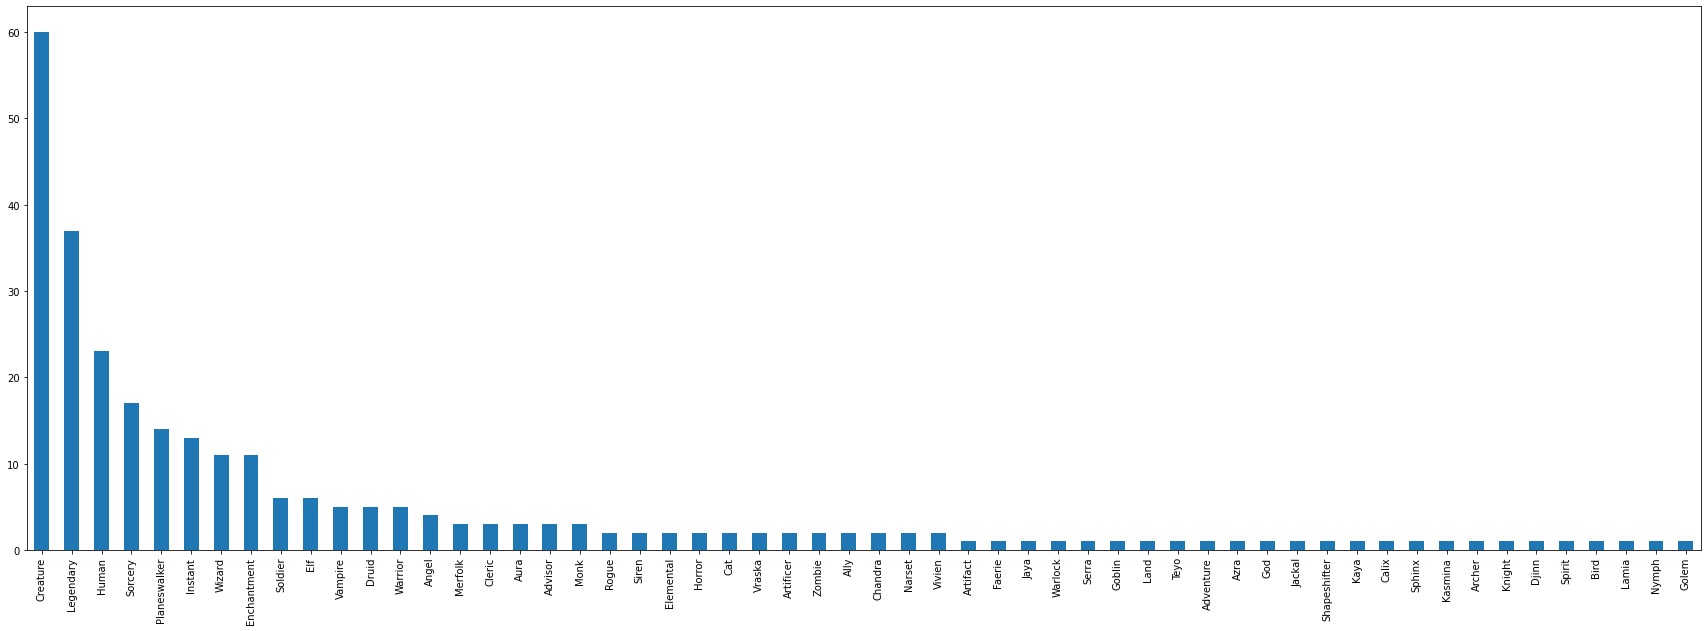

In [87]:
cards_by_magali['type_line'].str.split(expand=True, pat="—").stack().str.split(expand=True, pat="//").stack().str.split(expand=True).stack().value_counts().plot(kind='bar', figsize=(30, 10));

In [ ]:
df.groupby("artist").filter(lambda x: len(x) > 200).head(5)

This section and all above that will list amount of cards made by every artist

In [ ]:
plot = df.groupby('artist').filter(lambda x: len(x) >= 100)['artist'].value_counts().plot(kind='bar', figsize=(30, 10))

plot.set_title('Artist cards made above 150')
plot.set_xlabel('Artist')
plot.set_ylabel('Cards')

In [ ]:
plot = df.groupby('artist').filter(lambda x: len(x) < 150 and len(x) >= 100)['artist'].value_counts().plot(kind='bar', figsize=(30, 10))

plot.set_title('Artist cards made between 150 and 100')
plot.set_xlabel('Artist')
plot.set_ylabel('Cards')

In [ ]:
plot = df.groupby('artist').filter(lambda x: len(x) < 100 and len(x) >= 75)['artist'].value_counts().plot(kind='bar', figsize=(30, 10))

plot.set_title('Artist cards made between 100 and 75')
plot.set_xlabel('Artist')
plot.set_ylabel('Cards')

In [ ]:
plot = df.groupby('artist').filter(lambda x: len(x) < 75 and len(x) >= 50)['artist'].value_counts().plot(kind='bar', figsize=(30, 10))

plot.set_title('Artist cards made between 75 and 50')
plot.set_xlabel('Artist')
plot.set_ylabel('Cards')